### 4. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측
-규제가 적용되지 않은 선형 회귀를 사이킷런에서 구현한 클래스인 LinearRegression을 이용해 보스턴 주택 가격 예측 회귀 구현

#### LinearRegression 클래스 - Ordinary Least Squares
- 예측값과 실제 값의 RSS를 최소화해 OLS 추정 방식으로 구현한 클래스   
`class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)`

입력 파라미터
- fit_intercept:디폴트는 True, 절편 값 계산할 것인지 여부 지정
- normalize:디폴트는 False, fit_intercept가 False인 경우 무시됨. True이면 회귀 수행 전 입력 데이터 정규화   


속성
- coef_ : fit()메서드 수행 시 회귀 계수가 배열 형태로 저장하는 속성, shape는 (target 값 개수, 피처 개수)
- intercept_ : intercept 값


- OLS 기반 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받음
- 피처간의 상관관계가 매우 높은 경우 분산이 매우 커져 오류에 매우 민감해짐(다중 공선성 문제)
- 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제 적용
- PCA를 통한 차원 축소도 고려해 볼 수 있음

#### 회귀 평가 지표
- 실제 값과 회귀 예측값의 차이 값을 기반으로 한 지표가 중심임
|평가 지표|설명|수식
|---|:---:|:---:|
|MAE|Mean Absolute Error|$\frac{1}{n}\sum_{i=1}^{n}|Y_i-\hat{Y_i}|$
|MSE|Mean Squared Error|$\frac{1}{n}\sum_{i=1}^{n}(Y_i-\hat{Y_i})^2$
|RMSE|Root Mean Squared Error|$\sqrt{\frac{1}{n}\sum_{i=1}^{n}(Y_i-\hat{Y_i})^2}$
|R^2|분산 기반 예측 성능 평가|예측값 분산/실제값 분산|

- MAE
    - 일반적인 회귀 지표
    - 전체 흐름을 쉽게 파악할 수 있다
    - 이상치에 민감하지 않다
    - 각 오차에 동일한 가중치 부여한다.
    - *약간의 이상치가 있는 경우 사용*
    
    
- MSE
    - 회귀에서 사용되는 손실 함수
    - 예측 값과 실제 값의 차이를 확인하는 함수
    - MAE와 달리 최적값에 가까워질수록 이동값이 다르게 변화하기 때문에 최적값에 수렴하기 용이하다.
    - 이상치에 민감하여 모델 학습을 불안정하게 만들 가능성이 크다.
    - *이상치를 고려하여 모델 일반화해야하는 경우 사용*
    
    
- RMSE
    - 정밀도를 표현하는데 적합하다
    - MSE보다 이상치에 덜 민감하다
    - 예측 대상의 크기에 영향을 받음 ( RMSE가 동일해도 예측 대상의 크기에 따라 성능 평가가 달라질 수 있음 = 크기 의존적 Error) 
    - 각 오차가 다른 가중치를 갖는다 (큰 오류값 차이에 크게 패널티 부여)
    - 특이값, 이상치가 존재해도 계산 전체에 지나친 영향을 미치지 못하도록 제어
    - *모델 학습 시 이상치에 가중치 부여하고자 하는 경우 사용*
    
    
- MAPE(Mean Absolute Percentage Error)
    - 크기 의존적 Error의 단점을 커버하기위한 모델 
    - $M = \frac{100}{n}\sum_{t=1}^{n}|\frac{A_t - F_t}{A_t}|$
    - $A_t$:실제 값, $F_t$: 예측 값
    - 오차 변동폭을 실제 값으로 나눠 비율 상 같은 기준으로 비교 가능
    - At 실제 값이 1보다 작을 경우 무한대에 가까운 값을 가질 수도 있고, 실제 값이 0인 경우 계산할 수 없는 경우가 생김
    
    
- MASE(Mean Absolute Scaled Error)
    - 예측 값과 실제 값의 차이를 평소 움직이는 평균 변동폭으로 나눈 값
    - 평균 변동폭에 비해 얼마나 오차가 나는지 측정하는 기준
    - MASE =$\frac{1}{T}\sum_{t=1}^{T}(\frac{|e_t|}{\frac{1}{T-1}\sum_{t=2}^{T}|Y_t-Y_{t-1}|})$
    - 변동성이 큰 지표와 변동성이 낮은 지표를 같이 예측할 필요가 있을 때 유용하게 쓰임

#### LinearRegression을 이용해 보스턴 주택 가격 회귀 구현
- CRIM : 지역별 범죄 발생률
- ZN : 25,000평방피트를 초과하는 거주 지역의 비율
- INDUS : 비상업 지역 넓이 비율
- CHAS : 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX : 일산화질소 농도
- RM : 거주할 수 있는 방의 개수
- AGE : 1940년 이전에 건축된 소유 주택의 비율
- DIS : 5개 주요 고용센터까지의 가중 거리
- RAD : 고속도로 접근 용이도
- TAX : 10,000달러당 재산세율
- PTRATIO : 지역의 교사와 학생 수 비율
- B : 지역의 흑인 거주 비율
- LSTAT : 하위 계층의 비율
- MEDV : 본인 소유의 주택 가격(중앙값)

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [27]:
boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)
bostonDF['PRICE'] = boston.target
print(bostonDF.shape)
bostonDF.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


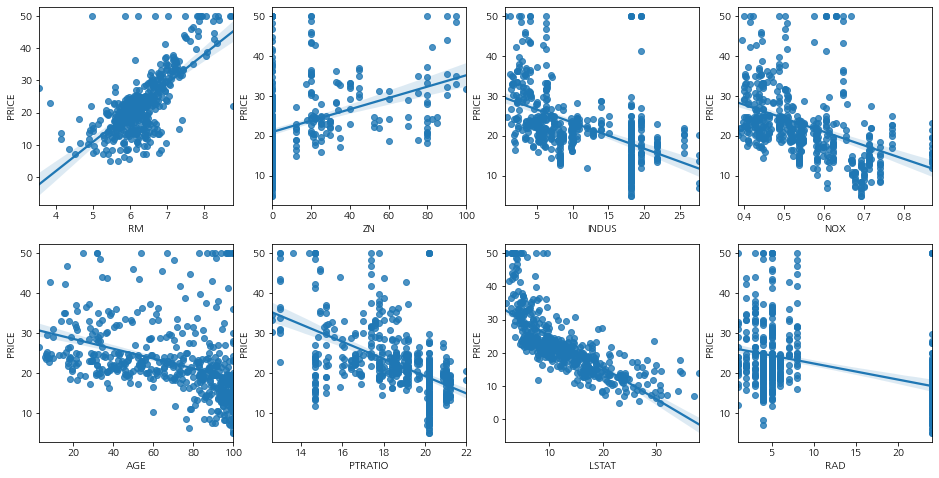

In [30]:
# 각 칼럼이 회귀 결과에 미치는 영향 시각화
fig,axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])
# RM(방 개수)과 LSTAT(하위 계층 비율)의 PRICE 영향도가 가장 두드러지게 나타남

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 17.297, RMSE: 4.159
Variance score : 0.757


In [33]:
print('절편 값:', lr.intercept_)
print('회귀 계수 값:', np.round(lr.coef_,1))

절편 값: 40.995595172164336
회귀 계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [34]:
# 회귀 계수 정렬을 위해 Series로 생성
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [37]:
# 교차 검증
from sklearn.model_selection import cross_val_score

lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 개별 Negative MSE scores:', np.round(neg_mse_scores,2))
print('5 folds 개별 RMSE scores:', np.round(rmse_scores,2))
print('5 folds 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds 평균 RMSE : 5.829
